<a href="https://colab.research.google.com/github/Fatai-soliu/bank-telemarketing/blob/main/Segmentation_of_Customers_in_Bank_Telemarketing_using_K_Means_and_DBSCAN_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segmentation of Customers in Bank Telemarketing using K-Means and DBSCAN Algorithms.

This notebook focus on the analysis and

In [151]:
#Import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [152]:
#Import the dataset

data = pd.read_csv('/content/drive/MyDrive/Datasets/bank.csv')

In [153]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [154]:
#Check the information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


The dataset contains 4521 records with 17 features containing both 7 numerical  and 10 categorical data. There are no missing values in this data.

In [155]:
data.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


## Exploratory Data Analysis

This EDA stage will focus on understanding the feature better and selecting the best features that is suitable for model training. The EDA will include Univariate Descriptive analysis and Bivariate inferential analysis, Handling missing data and Outliers

In [156]:
data.shape

(4521, 17)

In [157]:
## Check for missing data
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


There are no missing values in this dataset

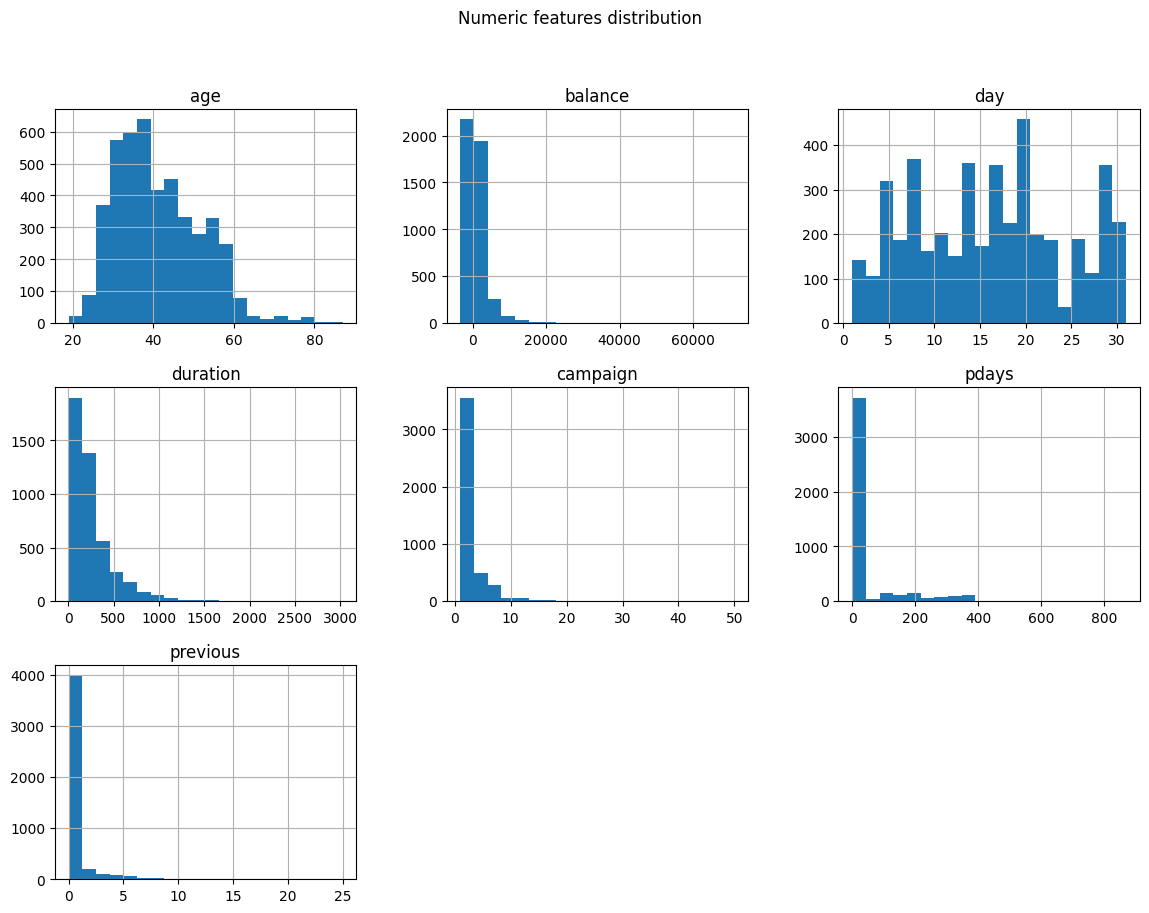

In [158]:
#Creating a histogram to visualise the data distribution for numeric columns

numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

data[numeric_columns].hist(figsize=(14, 10), bins=20)
plt.suptitle('Numeric features distribution')
plt.show()

Based on the histogram above, majority of the clients age fall between 29 years to 60 years

##Handling Outliers

To visualise and Identify outliers, boxplot were used on numerical columns `Age`, `balance`, `day`, `duration`, `campaign`, `pdays` and `previous`. These visualistions helps to identify the noises and distortion in the data



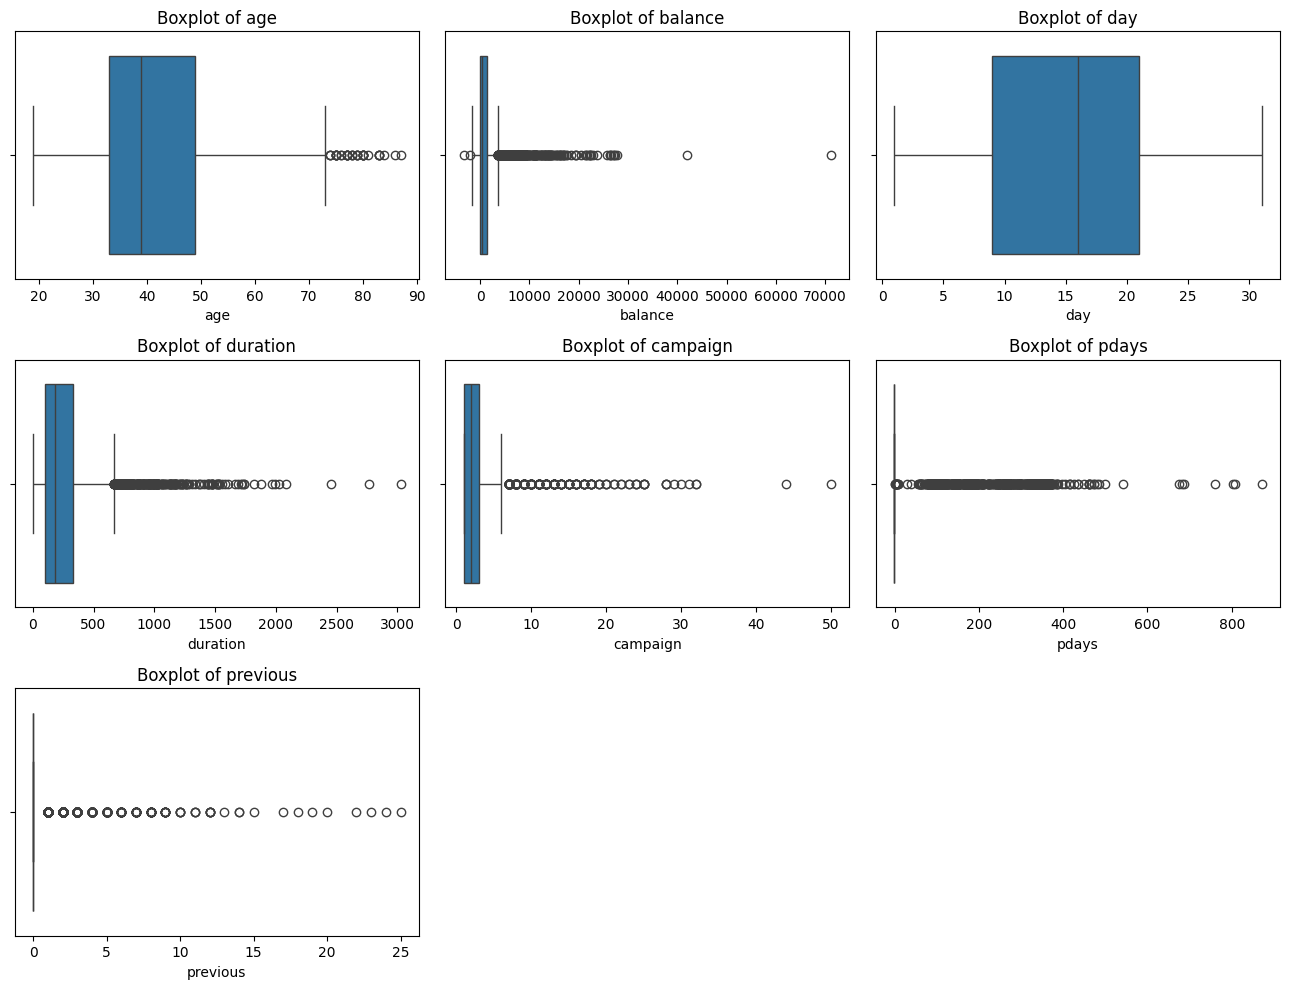

In [159]:
# Creating a boxplot for all numeric data in the dataset to spot outlier

numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(13, 10))

for i, col in enumerate(numeric_columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x = data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

Majority of the numeric columns contain outlier, outliers are indicated by the point below or above the whiskers of the boxplot as seen in boxplot of `Age`, `balance`, `duration` and `campaign`.  

Similarly the values in pdays and previous have a small range and mostly the same, hence the absense of the box.

Outliers were investigated further to confirm if they are valid or are as a result of errors and then handled accordingly

The Outliers will be handled using 2 different methods.

1. IQR Method (for `age`, `day`, `duration`): This method is used to cap outliers while maintaining good pattern in the dataset. it works well on normally distributed dataset like the numeric columns above.

2. 99th Percentile Capping (for `balance`, `campaign` and `previous`) : This method is used on numeric columns with high skewness (as found in most financial & marketing data) but valid data. This is to ensure data still retain natural distribution.

In [160]:
#Handling outlier - Capping outliers using Interquartile Range (IQR) method

def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return data

iqr_columns = ['age', 'day', 'duration']
for col in iqr_columns:
    data = cap_outliers_iqr(data, col)

print(data.head())

    age          job  marital  education default  balance housing loan  \
0  30.0   unemployed  married    primary      no     1787      no   no   
1  33.0     services  married  secondary      no     4789     yes  yes   
2  35.0   management   single   tertiary      no     1350     yes   no   
3  30.0   management  married   tertiary      no     1476     yes  yes   
4  59.0  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct      79.0         1     -1         0  unknown  no  
1  cellular   11   may     220.0         1    339         4  failure  no  
2  cellular   16   apr     185.0         1    330         1  failure  no  
3   unknown    3   jun     199.0         4     -1         0  unknown  no  
4   unknown    5   may     226.0         1     -1         0  unknown  no  


In [161]:
#Handling outlier - Capping outliers using 99th percentile-based method

def cap_outliers_percentile(data, column):
    upper_bound = data[column].quantile(0.99)
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else x)
    return data

percentile_columns = ['balance', 'campaign', 'previous']
for col in percentile_columns:
    data = cap_outliers_percentile(data, col)

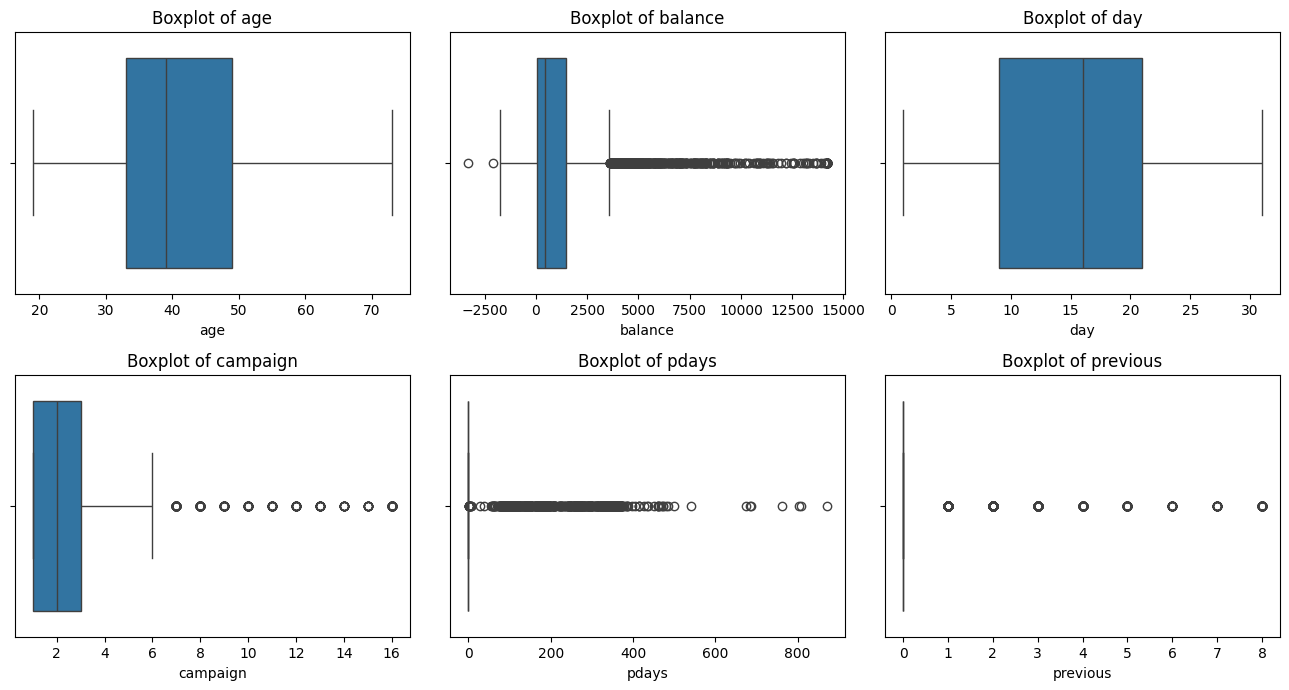

In [162]:
# Re-visualising the numeric columns after treating outliers

numeric_columns = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(13, 10))

for i, col in enumerate(numeric_columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x = data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

The dataset has now been cleaned, making it more reliable for further analysis.

In [163]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.123203,1352.030878,15.915284,241.785667,2.725061,39.766645,0.503871
std,10.416974,2428.934930,8.247667,185.397346,2.626585,100.121124,1.383866
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,73.000000,14194.600000,31.000000,666.500000,16.000000,871.000000,8.000000


In [164]:
# Checking the correlation between the numeric variables and the target column y

data['y'] = data['y'].map({'yes': 1, 'no': 0})

corr = data.corr(numeric_only=True)['y'].sort_values(ascending=False)
corr

,y
y,1.000000
duration,0.393818
previous,0.141416
pdays,0.104087
age,0.041021
balance,0.027570
day,-0.011244
campaign,-0.065348


Important note: duration, in seconds (numeric). this attribute highly affects the output target (e.g., if duration=0 then y='no'). and it can only be known after a call has already been performed and not before. By this time, y is obviously known as well. It also has the hightest positive correlation (0.393818) to the target variable compared to other **numeric **variable.

So to be able to build a realistic predictive model and avoid bias. This duration column needs to be dropped to prevent the model from overfitting

In [165]:
# Drop the duration column

data = data.drop(['duration'], axis=1)

## Univariate Descriptive Analysis

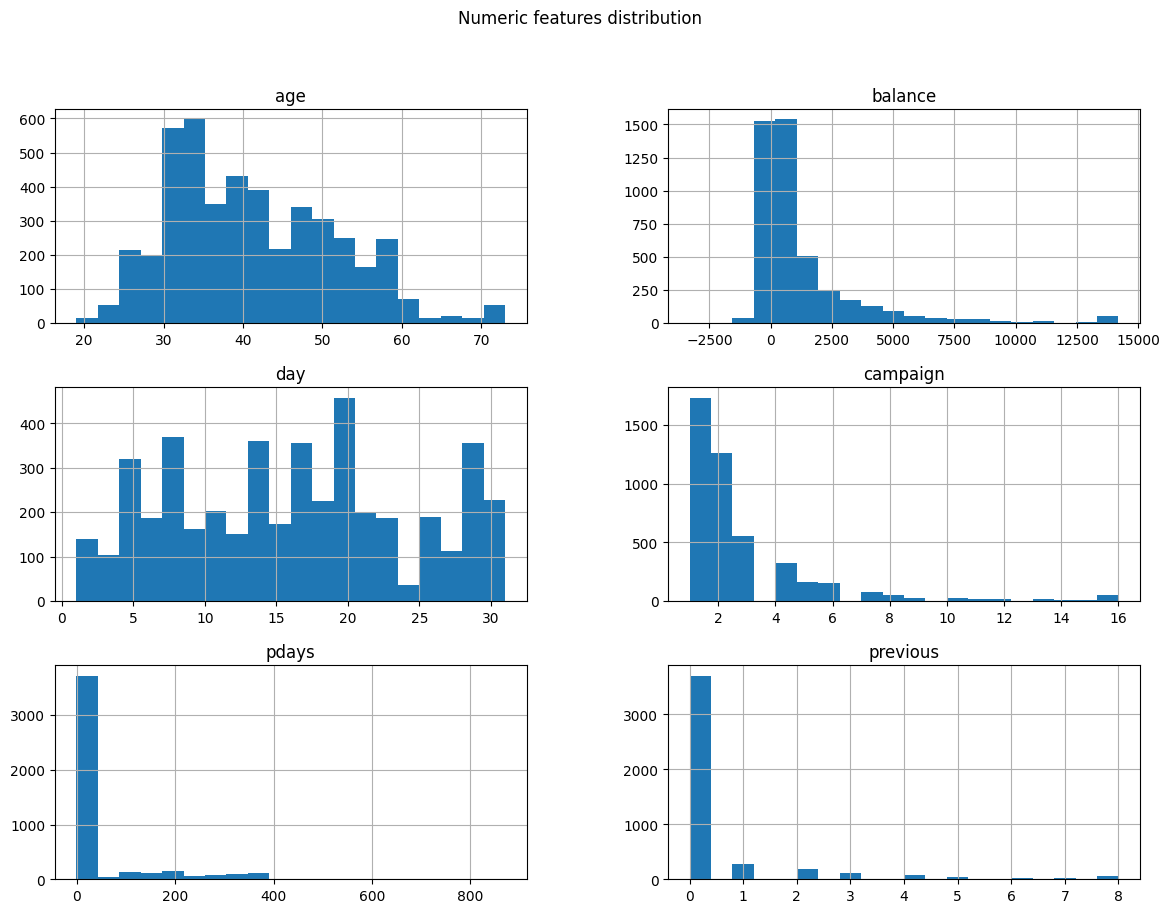

In [166]:
# Plotting histograms for numeric features

data[numeric_columns].hist(figsize=(14, 10), bins=20)
plt.suptitle('Numeric features distribution')
plt.show()


The histogram above shows the distribution of the data. The data are less skewed compared the result prior to outlier handling.

In [167]:
#Exclude Target Variable

data = data.drop(columns = ['y'])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,1.0,-1,0.0,unknown
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,1.0,339,4.0,failure
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,1.0,330,1.0,failure
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,4.0,-1,0.0,unknown
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,1.0,-1,0.0,unknown


##Bivariate Analysis

This analysis is done to understand the relationship among the numerical features. This will help identify important features that can be used in our model

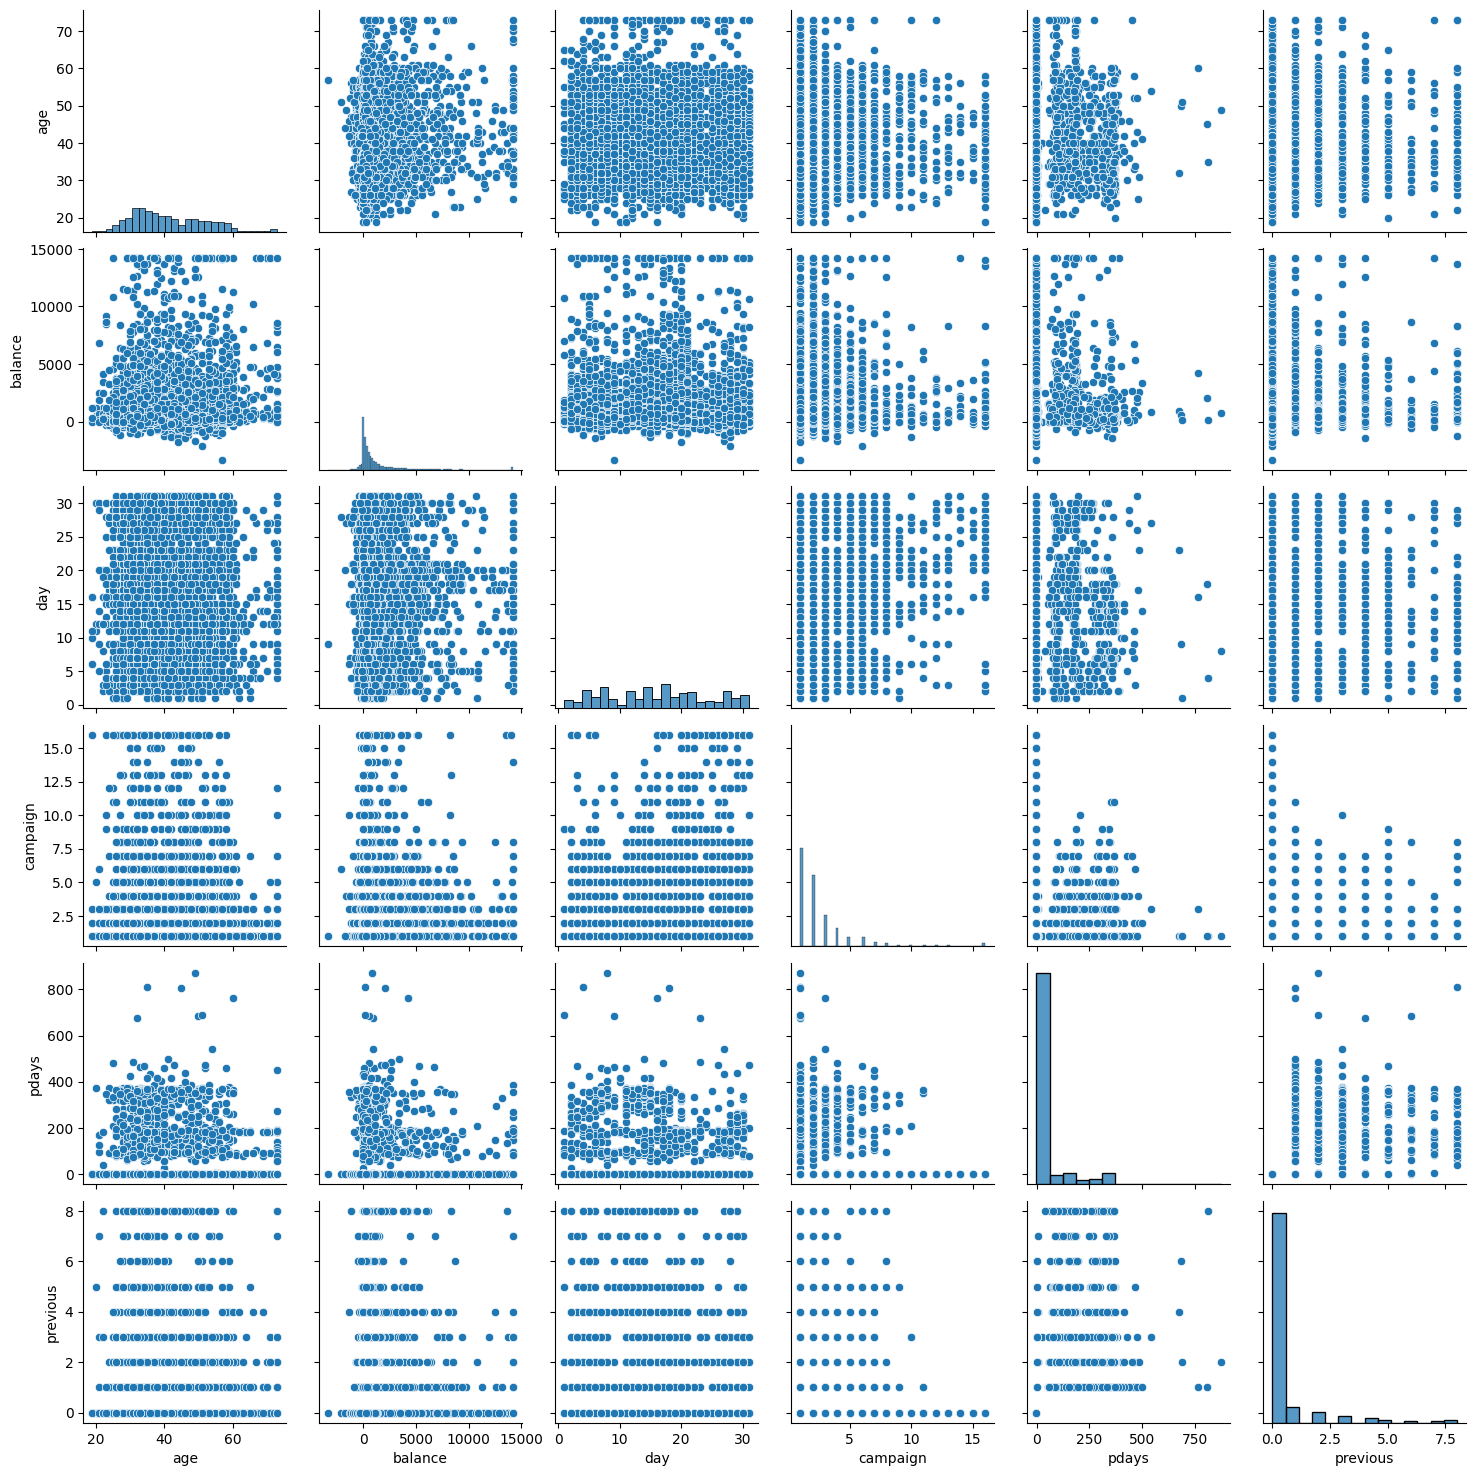

In [168]:
sns.pairplot(data[numeric_columns])

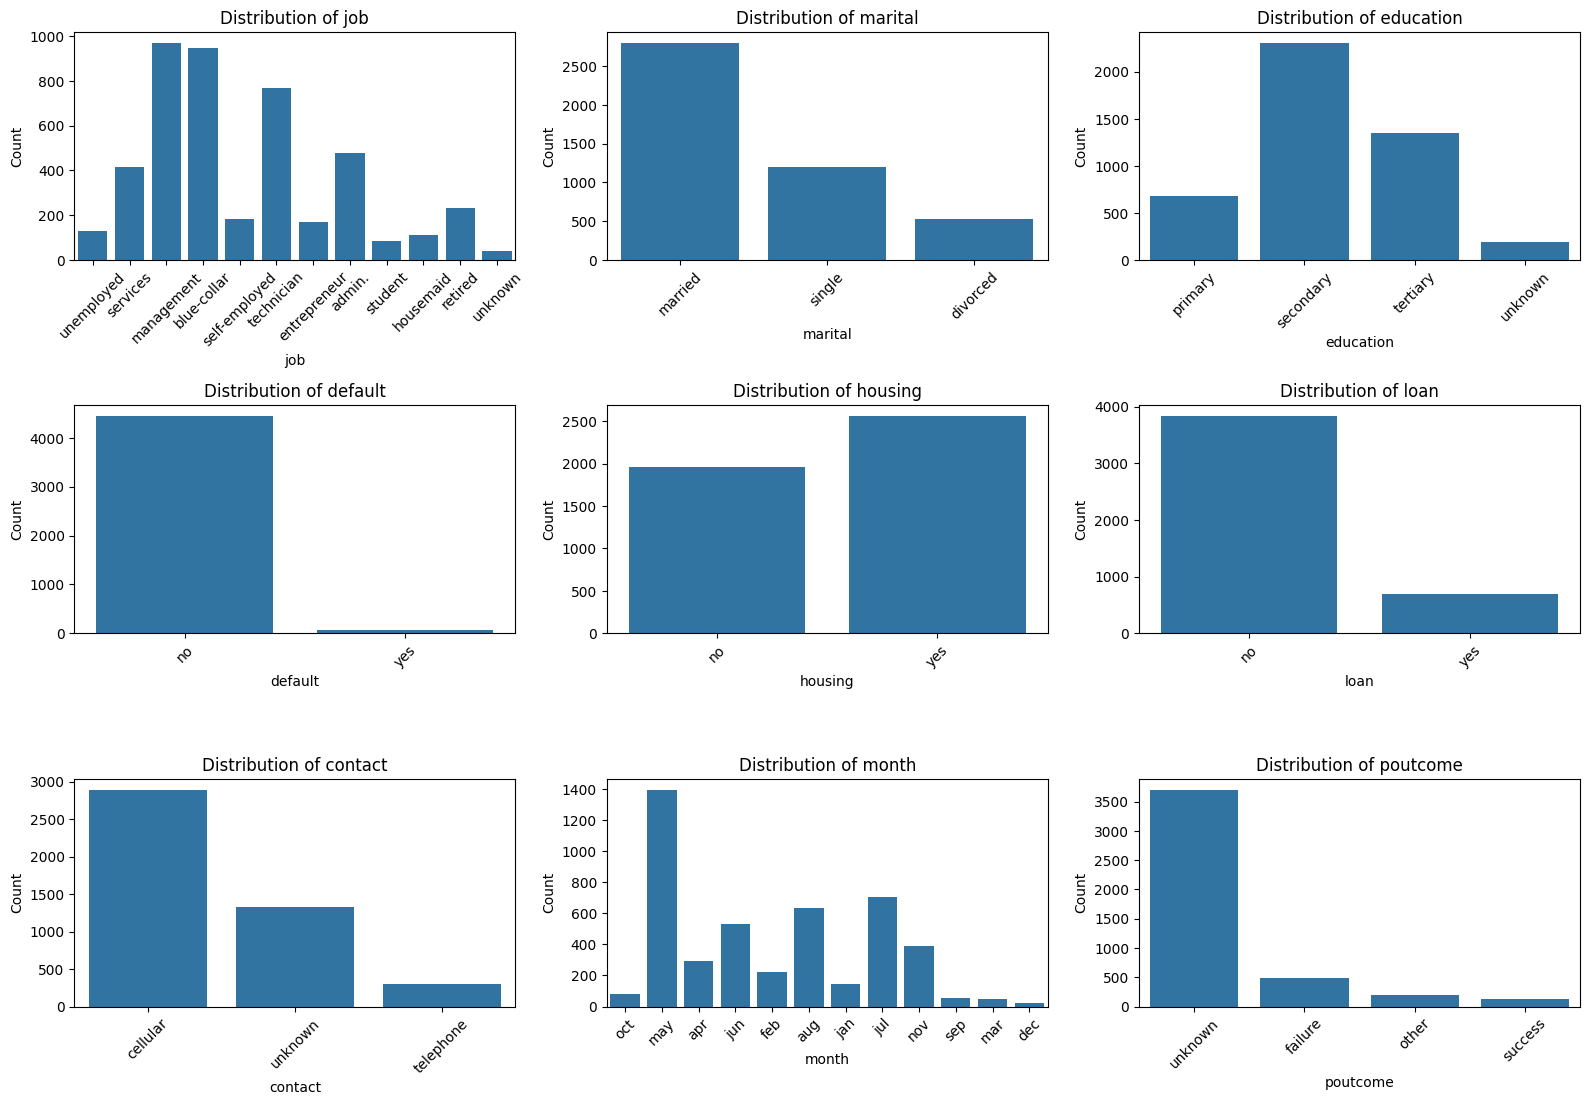

In [169]:
# Plot a bar chart for each categorical feature showing the count of each category

import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns excluding 'y'
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Plot bar charts for each categorical feature
plt.figure(figsize=(16, 14))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=data, x=col, hue=None)  # Explicitly set hue=None
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

`Job`: The Job category have a diverse distribution. management and blue-collar appears more frequently than others. entreprenuer appear less frequently.

`Marital`: The marital status distribution shows a large number of married individuals, followed by single and divorced.

`Education`: Education level is has a diverse distribution, with majority counts been across secondary and tertiary while few are unknown.

`Default`: The majority of values in default are no, indicating very few individuals with a history of credit default.

`Housing`: The majority of clients have a housing loan (yes), though there is also a signifant proportion with no.

`Loan`: Similar to housing, najority of the clients do not have a personal loan, only a small fraction has personal loan.

`Contact`: The distribution of contact type (e.g., cellular, telephone) could reveal differences in customer preferences and responsiveness to contact methods. Majority were contact via cellular, while there is a noticable amount of unknown option and least clients are contacted via telephone

`Month`: Some months (e.g., may, jul) show significantly higher counts, suggesting seasonal trends in marketing campaigns.

`Poutcome`:  The majority of values are unknown, with fewer instances for success and failure. Despite the high rate of unknown, this feature is important



In [170]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,1.0,-1,0.0,unknown
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,1.0,339,4.0,failure
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,1.0,330,1.0,failure
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,4.0,-1,0.0,unknown
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,1.0,-1,0.0,unknown
5,35.0,management,single,tertiary,no,747.0,no,no,cellular,23,feb,2.0,176,3.0,failure
6,36.0,self-employed,married,tertiary,no,307.0,yes,no,cellular,14,may,1.0,330,2.0,other
7,39.0,technician,married,secondary,no,147.0,yes,no,cellular,6,may,2.0,-1,0.0,unknown
8,41.0,entrepreneur,married,tertiary,no,221.0,yes,no,unknown,14,may,2.0,-1,0.0,unknown
9,43.0,services,married,primary,no,-88.0,yes,yes,cellular,17,apr,1.0,147,2.0,failure


## Encoding Categorical Variables

**Methodologies for Encoding:**

**Label Encoding:**

Label encoding is a straightforward method that converts categorical values into numeric labels. This technique is particularly useful for ordinal data where categories have a natural order. For example, education can be encoded numerically to reflect their order.

**One-Hot Encoding:**

One-hot encoding is a technique that creates binary columns for each category in a categorical variable. This method is suitable for nominal data where categories do not have a natural order. One-hot encoding prevents the model from assuming any ordinal relationship between the categories.

In [171]:
#Convert all categorical variable to numeric using One-hot encoding
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder for ordinal categorical variables
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'education' column
data['education'] = label_encoder.fit_transform(data['education'])

nominal_columns = ['job', 'housing', 'loan', 'contact', 'default', 'month', 'poutcome', 'marital']

# Apply One-Hot Encoding to nominal categorical variables
encoded_data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

In [172]:
encoded_data.head()

,age,education,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,marital_married,marital_single
0,30.0,0,1787.0,19,1.0,-1,0.0,False,False,False,...,False,False,False,True,False,False,False,True,True,False
1,33.0,1,4789.0,11,1.0,339,4.0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,35.0,2,1350.0,16,1.0,330,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,30.0,2,1476.0,3,4.0,-1,0.0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,59.0,1,0.0,5,1.0,-1,0.0,True,False,False,...,False,True,False,False,False,False,False,True,True,False


One hot encoding was used because it suitable when majority of the categorical variable has no clear ordinal relationship

In [173]:
encoded_data.shape

(4521, 39)

There are now 40 columns in the data after applying one-hot encoding

## Features Selection


In [174]:
#Applying Variance Threshold to remove low or no variance features
from sklearn.feature_selection import VarianceThreshold

X = encoded_data

# Initializing VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X)

In [175]:
# Get names of features that were retained
selected_columns = X.columns[selector.get_support(indices=True)]
print("Selected features based on Variance Threshold:\n", selected_columns)

print(f"{X.shape[1]-X_selected.shape[1]} features have been removed, {X_selected.shape[1]} features remain")

Selected features based on Variance Threshold:
 Index(['age', 'education', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'default_yes',
       'month_aug', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'marital_married', 'marital_single'],
      dtype='object')
2 features have been removed, 37 features remain


## Standardizing Features

In [176]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X = sc_X.fit_transform(X_selected)


X is now standardized and ready for model training

In [177]:
X[:4,:5]

array([[-1.06791403e+00, -1.64475535e+00,  1.79097937e-01,
         3.74052063e-01, -6.56842090e-01],
       [-7.79890685e-01, -3.09037919e-01,  1.41516730e+00,
        -5.96026456e-01, -6.56842090e-01],
       [-5.87875121e-01,  1.02667951e+00, -8.36211272e-04,
         1.02726187e-02, -6.56842090e-01],
       [-1.06791403e+00,  1.02667951e+00,  5.10441153e-02,
        -1.56610497e+00,  4.85451700e-01]])

## Applying Clustering Algorithm - K-Means

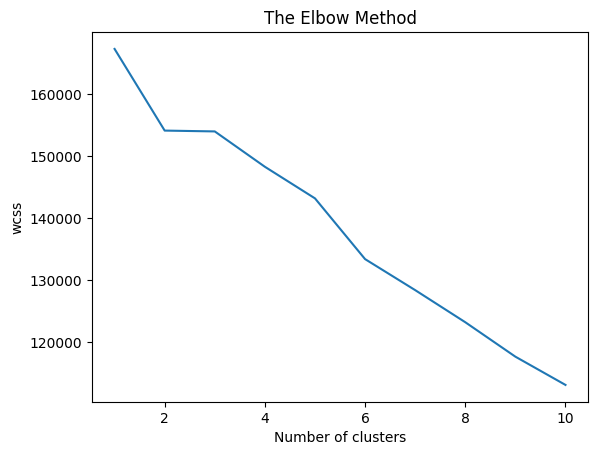

In [178]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Selecting k=2

In [179]:
#Let's fit the K-Means to the dataset and then plot the scatter plot

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X)

In [180]:
y_kmeans

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [181]:
## We need to reduce the dimensionality before we can visualise

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.08760681, 0.06635476])

In [182]:
sum(pca.explained_variance_ratio_)

0.15396156985888892

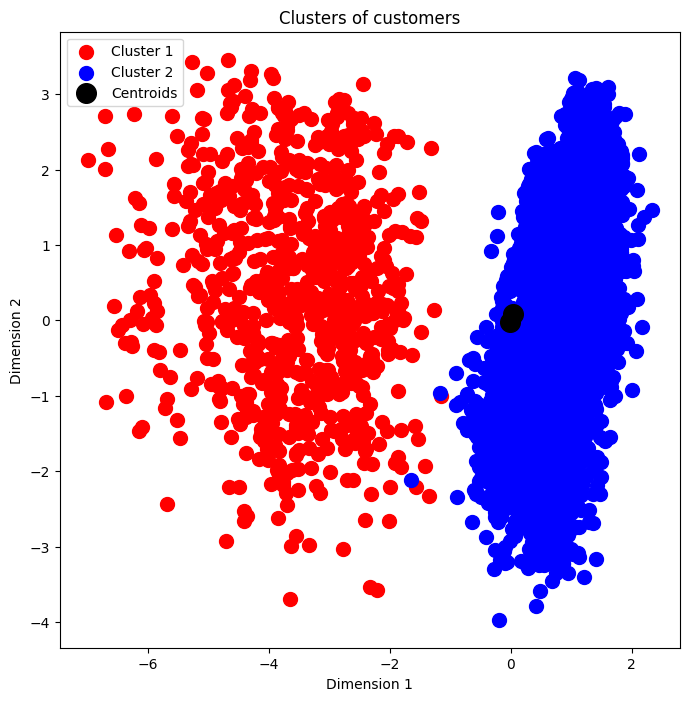

In [183]:
#Visualising the clusters

colours = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(kmeans.n_clusters):
  plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1],
              s = 100, c= colours[i], label = 'Cluster '+str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='o', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [184]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_reduced, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5741403851639586
